In [1]:
import dataCleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random as rn

In [2]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

[Text(0.5, 1.0, 'Unique labels: 3832')]

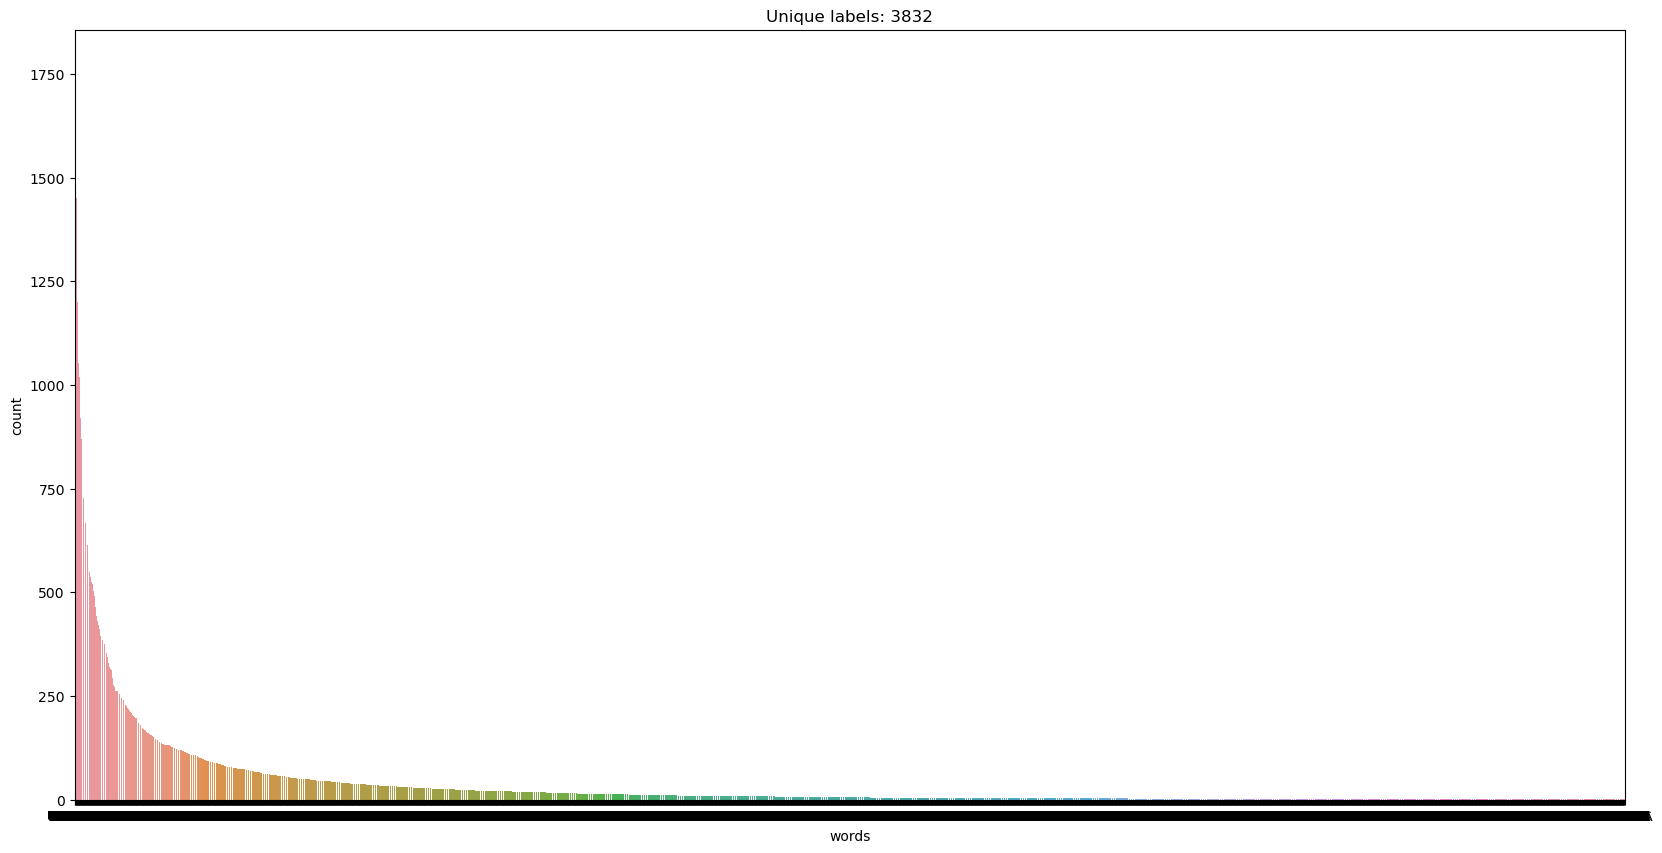

In [3]:
from collections import Counter

counter = Counter(labels)

fig = plt.figure(1, figsize = (20,10))
most_frequent = counter.most_common()

data = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = data).set(title='Unique labels: ' + str(len(np.unique(labels))))

In [4]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

filtered_labels, filtered_imgs = dataCleaning.remove_min_occurences(labels, imgs)

[('U+4E00', 1768), ('U+4E91', 1766), ('U+4E8B', 1674), ('U+4EBA', 1575), ('U+53C8', 1451), ('U+5165', 1259), ('U+7269', 1199), ('U+51FA', 1121), ('U+898B', 1066), ('U+5927', 1052), ('U+5B50', 1033), ('U+6B64', 1019), ('U+5176', 1002), ('U+4E5F', 997), ('U+65E5', 920), ('U+5C0F', 898), ('U+65B9', 870), ('U+4E0A', 865), ('U+662F', 820), ('U+4E09', 793), ('U+4E2D', 789), ('U+4F55', 728), ('U+5019', 723), ('U+5973', 721), ('U+56FD', 678), ('U+4E8C', 668), ('U+6642', 667), ('U+4ECA', 663), ('U+5FA1', 637), ('U+6709', 627), ('U+6240', 625), ('U+5FC3', 614), ('U+524D', 592), ('U+5408', 583), ('U+6C34', 578), ('U+8EAB', 552), ('U+4E94', 550), ('U+5C71', 546), ('U+5341', 537), ('U+540C', 529), ('U+6C41', 527), ('U+7D66', 524), ('U+624B', 522), ('U+7ACB', 520), ('U+8695', 520), ('U+69D8', 509), ('U+4E4B', 504), ('U+4E0B', 499), ('U+5409', 491), ('U+4E16', 486), ('U+8A00', 481), ('U+7533', 464), ('U+4ED5', 459), ('U+6708', 444), ('U+56DB', 437), ('U+9152', 433), ('U+540D', 431), ('U+751F', 427), 

[Text(0.5, 1.0, 'Unique labels: 310')]

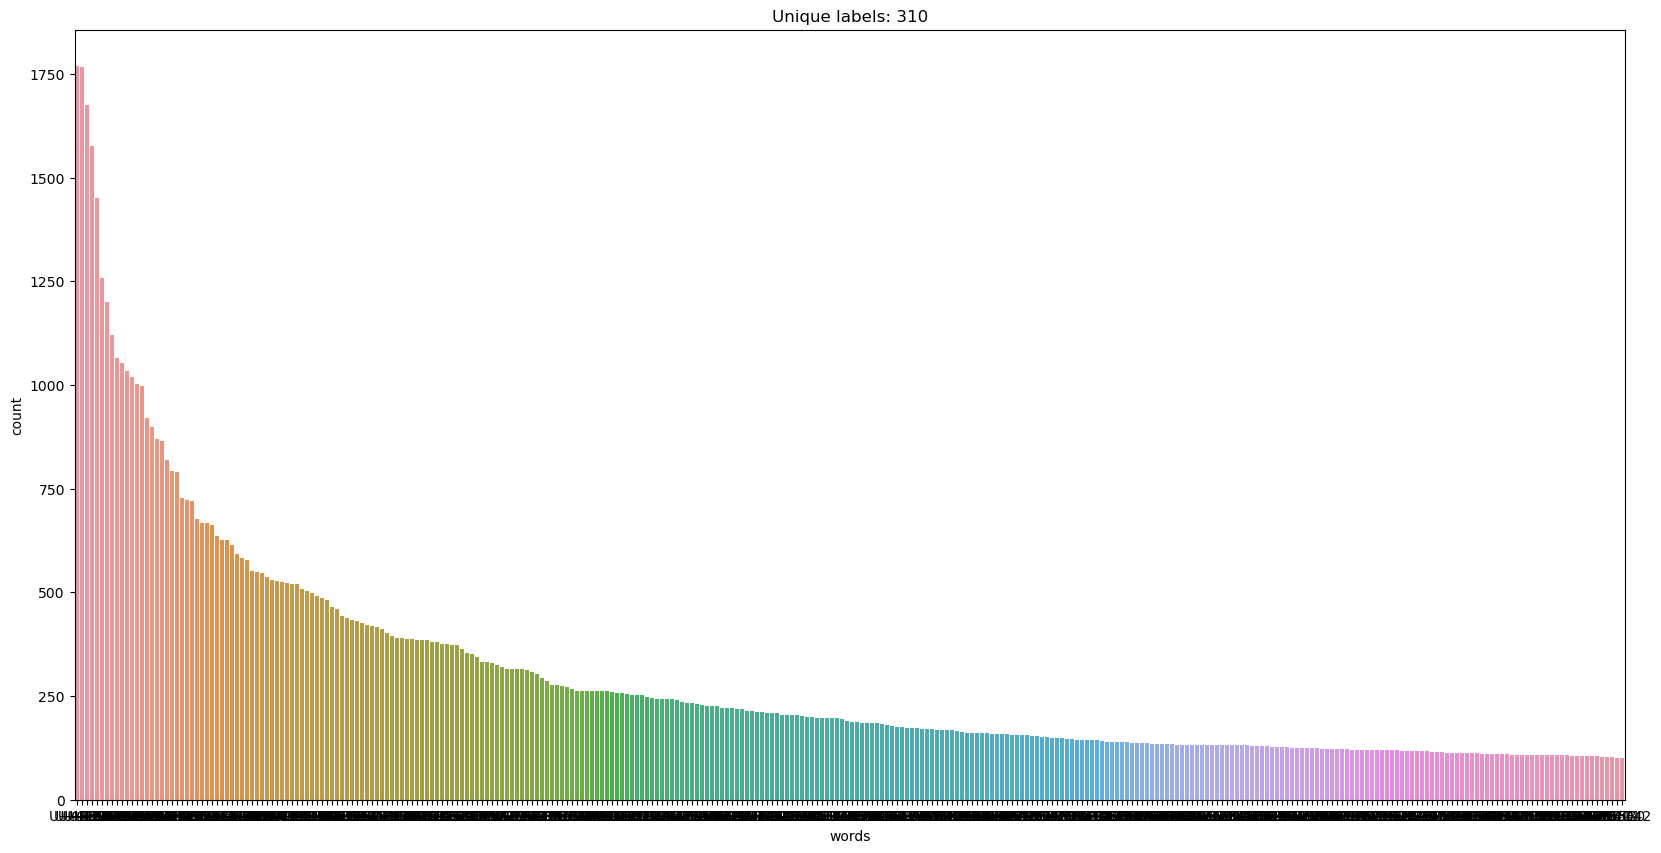

In [5]:
counter = Counter(filtered_labels)

fig = plt.figure(1, figsize = (20,10))
most_frequent = counter.most_common()
print(most_frequent)
data = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = data).set(title='Unique labels: ' + str(len(np.unique(filtered_labels))))

In [6]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

filtered_labels, filtered_imgs = dataCleaning.remove_min_occurences(labels, imgs)

unique_labels = np.unique(filtered_labels)

In [7]:
def get_example_images(idx):
    la = [x for x in range(0,len(filtered_labels)) if filtered_labels[x] == unique_labels[idx]]
    images = filtered_imgs[la[0]:la[-1]]
    return images

def get_contour_amount(images):
    contour_list = []
    for i in range(0,len(images)):
        count = 0
        ret, thresh = cv2.threshold(images[i], 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        for c in contours:
            if cv2.contourArea(c) > 15:
                count+=1
        contour_list.append((i,count))
    return contour_list


In [8]:
images1 = get_example_images(4)
images2 = get_example_images(5)
images3 = get_example_images(6)
images4 = get_example_images(7)
contours1 = get_contour_amount(images1)
contours2 = get_contour_amount(images2)
contours3 = get_contour_amount(images3)
contours4 = get_contour_amount(images4)



[Text(0.5, 1.0, 'Label: U+4E16')]

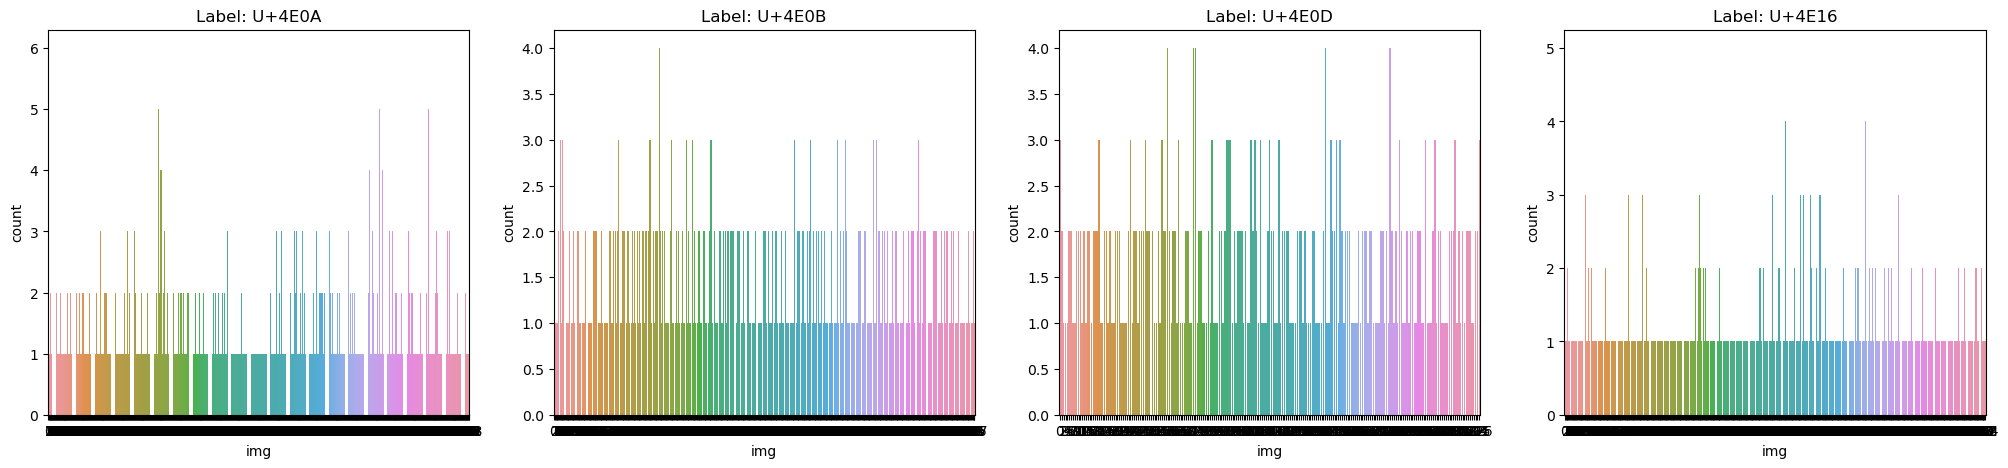

In [9]:
fig, axs = plt.subplots(ncols=4, figsize=(25,5))

data1 = pd.DataFrame(contours1, columns=("img","count"))
data2 = pd.DataFrame(contours2, columns=("img","count"))
data3 = pd.DataFrame(contours3, columns=("img","count"))
data4 = pd.DataFrame(contours4, columns=("img","count"))


sns.barplot(x='img', y='count', data=data1, ax=axs[0]).set(title='Label: ' + unique_labels[4])
sns.barplot(x='img', y='count', data=data2, ax=axs[1]).set(title='Label: ' + unique_labels[5])
sns.barplot(x='img', y='count', data=data3, ax=axs[2]).set(title='Label: ' + unique_labels[6])
sns.barplot(x='img', y='count', data=data4, ax=axs[3]).set(title='Label: ' + unique_labels[7])


In [10]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

filtered_labels, filtered_imgs = dataCleaning.remove_min_occurences(labels, imgs)
filtered_labels, filtered_imgs = dataCleaning.remove_by_contours(filtered_labels, filtered_imgs)

unique_labels = np.unique(filtered_labels)

In [11]:
images1 = get_example_images(4)
images2 = get_example_images(5)
images3 = get_example_images(6)
images4 = get_example_images(7)
contours1 = get_contour_amount(images1)
contours2 = get_contour_amount(images2)
contours3 = get_contour_amount(images3)
contours4 = get_contour_amount(images4)

[Text(0.5, 1.0, 'Label: U+4E16')]

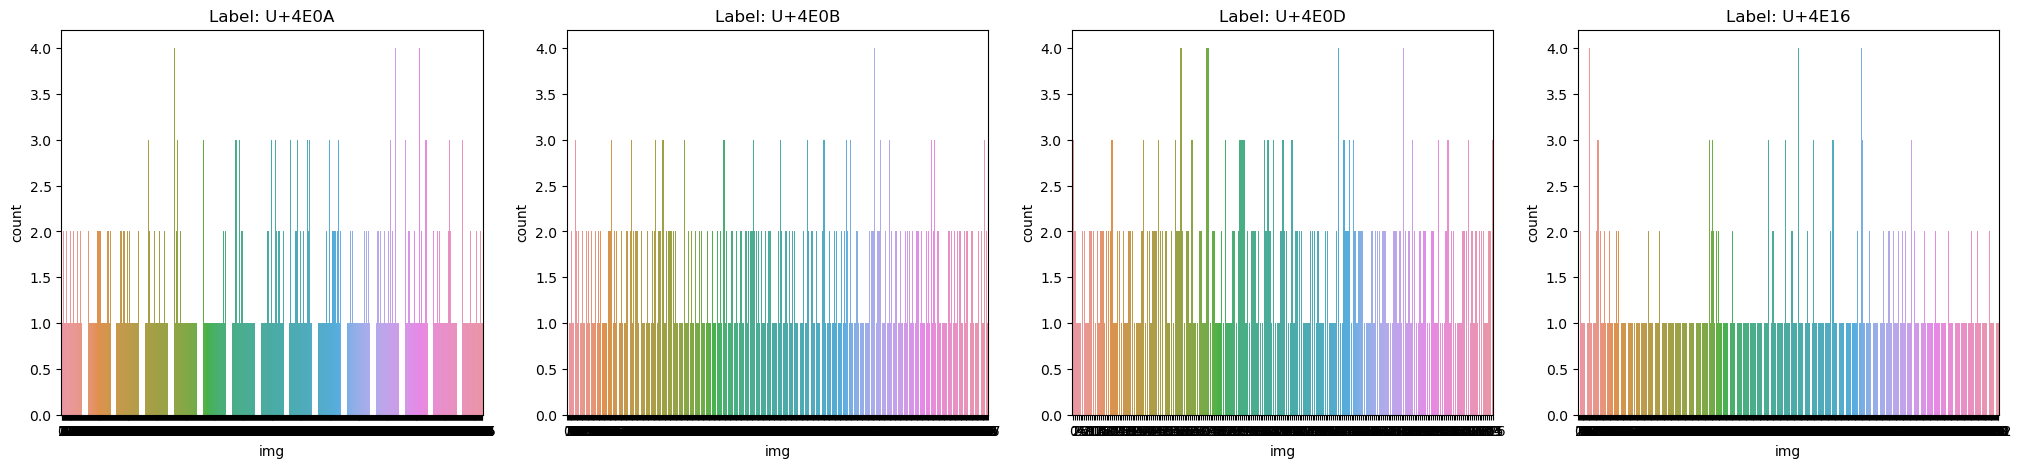

In [12]:
fig, axs = plt.subplots(ncols=4, figsize=(25,5))

data1 = pd.DataFrame(contours1, columns=("img","count"))
data2 = pd.DataFrame(contours2, columns=("img","count"))
data3 = pd.DataFrame(contours3, columns=("img","count"))
data4 = pd.DataFrame(contours4, columns=("img","count"))


sns.barplot(x='img', y='count', data=data1, ax=axs[0]).set(title='Label: ' + unique_labels[4])
sns.barplot(x='img', y='count', data=data2, ax=axs[1]).set(title='Label: ' + unique_labels[5])
sns.barplot(x='img', y='count', data=data3, ax=axs[2]).set(title='Label: ' + unique_labels[6])
sns.barplot(x='img', y='count', data=data4, ax=axs[3]).set(title='Label: ' + unique_labels[7])

In [13]:
filtered_labels, filtered_imgs = dataCleaning.remove_min_occurences(labels, imgs)
filtered_labels2, filtered_imgs2 = dataCleaning.remove_by_contours(filtered_labels, filtered_imgs)
filtered_labels, filtered_imgs = dataCleaning.remove_by_contours2(filtered_labels, filtered_imgs)
removed_labels = []
removed_images = []
non_removed_labels = []
non_removed_images = []
filtered_labels2 = np.array(filtered_labels2)
for i in range(5):
    l=rn.randint(0,len(filtered_labels))
    removed_labels.append(filtered_labels[l])
    removed_images.append(filtered_imgs[l])
    x = np.where(filtered_labels2==removed_labels[i])[0][0]
    non_removed_labels.append(filtered_labels2[x])
    non_removed_images.append(filtered_imgs2[x])
print(non_removed_labels)
print(removed_labels)

['U+7136', 'U+6240', 'U+5929', 'U+61F8', 'U+98EF']
['U+7136', 'U+6240', 'U+5929', 'U+61F8', 'U+98EF']


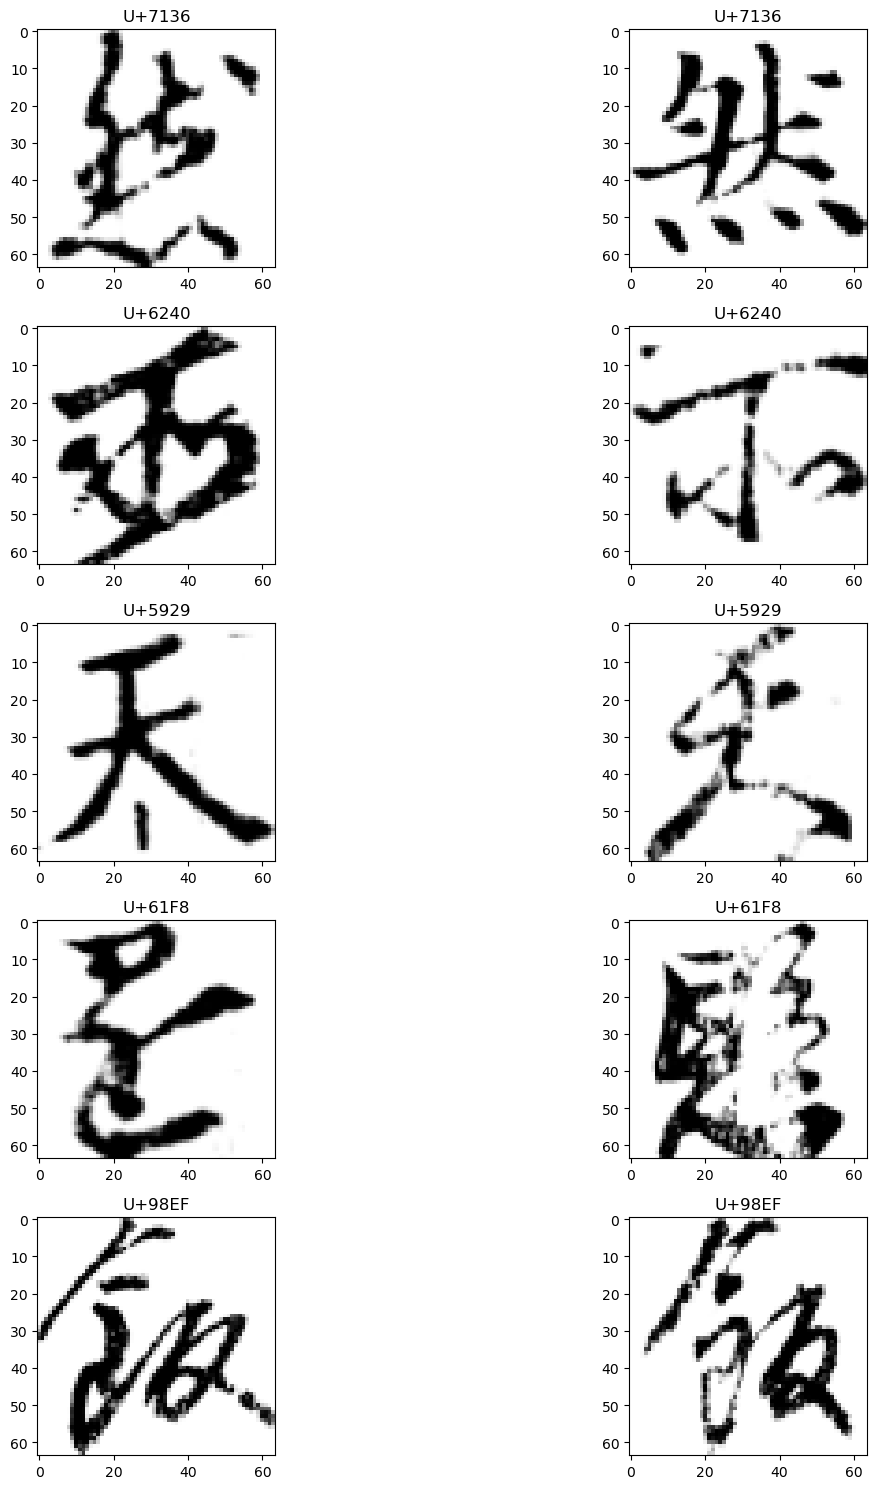

In [14]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
        ax[i,0].imshow(non_removed_images[i], cmap='Greys')
        ax[i,0].set_title(non_removed_labels[i])
        ax[i,1].imshow(removed_images[i], cmap='Greys')
        ax[i,1].set_title(removed_labels[i])
        
        
plt.tight_layout()